In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


In [5]:


file_256 = open("./Data/WSIS-N-256-Sol-0.0.dat")
file_128 = open("./Data/WSIS-N-128-Sol-0.0.dat")
file_64 = open("./Data/WSIS-N-64-Sol-0.0.dat")

# file_256 = open("./Data/MMG-N-32-B-0.000000-Sol-0.0.dat")
# file_128 = open("./Data/MMG-N-16-B-0.000000-Sol-0.0.dat")
# file_64  = open("./Data/MMG-N-8-B-0.000000-Sol-0.0.dat")

files = [file_64,file_128,file_256]

files = [file.readlines() for file in files]

file_64.close()
file_128.close()
file_256.close()

files = [[[float(num) for num in line.split(", ") if num != "\n"] for line in lines] for lines in files]


radials = [np.array(file.pop(0)) for file in files]
times   = [np.array(file.pop(len(file)-1)) for file in files]


files = [np.array(file) for file in files]

print(files[0].shape)
print(files[1].shape)
print(files[2].shape)
print(times[0].shape)
print(radials[0].shape)

NF = int(files[0].shape[1]/(2*radials[0].shape[0]))

print("NF = ", NF)

(6303, 640)
(12703, 1280)
(25503, 2560)
(6303,)
(64,)
NF =  5


In [6]:
datas_real = [np.array([(file[:,2*i::2*NF]) for i in range(NF)]) for file in files]
datas_imag = [np.array([(file[:,2*i+1::2*NF]) for i in range(NF)]) for file in files]

  
datas_real_it = [np.array([[ np.interp(times[-1],times[i],datas_real[i][c,:,r]) for r in range(datas_real[i].shape[2]) ]  for c in range(NF)])  for i in range(len(datas_real)-1)]

data_real_itr = [np.array([[np.interp(radials[-1],radials[i],datas_real_it[i][c,:,t]) for t in range(datas_real_it[i].shape[2])] for c in range(NF)]) for i in range(len(datas_real_it))]




print(data_real_itr[0].shape)
print(data_real_itr[1].shape)
print(datas_real[2].shape)

final_datas_real = np.array([data for data in data_real_itr] + [datas_real[-1]])




(5, 25503, 256)
(5, 25503, 256)
(5, 25503, 256)


(3, 5, 25503, 256)
(25503, 1280)
(25503,)
(25503, 1280)


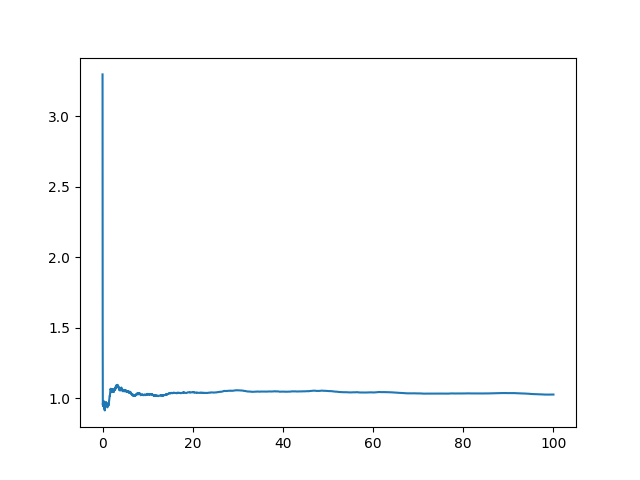

In [7]:
# fille, component, time, position

R = radials[-1]
T = times[-1]
print(final_datas_real.shape)

numer = final_datas_real[0]-final_datas_real[1]
numer = np.swapaxes(numer,0,1)
numer = numer.reshape((numer.shape[0], numer.shape[1]*numer.shape[2]))
print(numer.shape)
numer = np.apply_along_axis(np.square,1,numer)
numer = np.apply_along_axis(np.mean,1,numer)
numer = np.sqrt(numer)

print(numer.shape)

denom = final_datas_real[1]-final_datas_real[2]
denom = np.swapaxes(denom,0,1)
denom = denom.reshape((denom.shape[0], denom.shape[1]*denom.shape[2]))
print(denom.shape)
denom = np.apply_along_axis(np.square,1,denom)
denom = np.apply_along_axis(np.mean,1,denom)
denom = np.sqrt(denom)

convergence = numer/denom

fig, ax = plt.subplots()

ax.plot(T,convergence)

In [44]:
file_256 = open("./Data/WSIS-N-256-Const.dat")
file_128 = open("./Data/WSIS-N-128-Const.dat")
file_64 = open("./Data/WSIS-N-64-Const.dat")

files = [np.array([[float(num) for num in line.split(", ") if num != ", "] for line in file.readlines()]) for file in [file_64,file_128,file_256]]

times = [data[:,0] for data in files]

datas = [data[:,1:] for data in files]

datas_interp = np.array([[np.interp(times[-1],times[i],datas[i][:,j]) for j in range(datas[i].shape[1])] for i in range(len(datas))])
print(times[-1].shape)
print(datas_interp.shape)

numerator   = datas_interp[0]-datas_interp[1]
denominator = datas_interp[1]-datas_interp[2]


consts_1 = np.array([np.polyfit(times[-1],datas_interp[i,0,:],1)[-1] for i in range(datas_interp.shape[0])])
consts_2 = np.array([np.polyfit(times[-1],datas_interp[i,1,:],1)[-1] for i in range(datas_interp.shape[0])])

print(consts_1, consts_2)

print(consts_1[0]/consts_1[1], consts_1[1]/consts_1[2])

print(consts_2[0]/consts_2[1], consts_2[1]/consts_2[2])






(25501,)
(3, 2, 25501)
[0.11185466 0.07170576 0.04711812] [1.01569986e-04 1.73696150e-05 2.97241326e-06]
1.559911709361497 1.5218296954185444
5.847566953644908 5.843607015138632
